# Question 2: WHO Tuberculosis Data Analysis

We merge WHO tuberculosis data (before and after 2000), convert these to a tidy format, and explore findings on Afghanistan, Norway, and India.

## 1. Load Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## 2. Load Data

In [3]:
# Load WHO tuberculosis data
df_before = pd.read_csv('Data/WHO_Tuberculosis_data/Data_before_2000.csv')
df_after = pd.read_csv('Data/WHO_Tuberculosis_data/Data_after_2000.csv')

print(f"Before 2000 shape: {df_before.shape}")
print(f"After 2000 shape: {df_after.shape}")
print("\nBefore 2000 sample:")
print(df_before.head())

Before 2000 shape: (1045575, 59)
After 2000 shape: (3000, 59)

Before 2000 sample:
  iso2 iso3    year  new_sp_m014  new_sp_m1524  new_sp_m2534  new_sp_m3544  \
0   AF  AFG  1980.0          NaN           NaN           NaN           NaN   
1   AF  AFG  1981.0          NaN           NaN           NaN           NaN   
2   AF  AFG  1982.0          NaN           NaN           NaN           NaN   
3   AF  AFG  1983.0          NaN           NaN           NaN           NaN   
4   AF  AFG  1984.0          NaN           NaN           NaN           NaN   

   new_sp_m4554  new_sp_m5564  new_sp_m65  ...  newrel_m4554  newrel_m5564  \
0           NaN           NaN         NaN  ...           NaN           NaN   
1           NaN           NaN         NaN  ...           NaN           NaN   
2           NaN           NaN         NaN  ...           NaN           NaN   
3           NaN           NaN         NaN  ...           NaN           NaN   
4           NaN           NaN         NaN  ...           N

/var/folders/y8/8vnc0nnx1_j_l61l5tjlj1sh0000gn/T/ipykernel_48802/3717551205.py:2: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_before = pd.read_csv('Data/WHO_Tuberculosis_data/Data_before_2000.csv')


## 3. Merge Datasets

In [33]:
# Concatenate both datasets
df_who = pd.concat([df_before, df_after], ignore_index=True)

# Remove rows with all NaN values
df_who = df_who.dropna(how='all')

# Drop rows where iso3 is missing (no country identifier)
df_who = df_who.dropna(subset=['iso3'])

print(f"Merged dataset shape: {df_who.shape}")
print(df_who.head())

Merged dataset shape: (7441, 59)
  iso2 iso3    year  new_sp_m014  new_sp_m1524  new_sp_m2534  new_sp_m3544  \
0   AF  AFG  1980.0          NaN           NaN           NaN           NaN   
1   AF  AFG  1981.0          NaN           NaN           NaN           NaN   
2   AF  AFG  1982.0          NaN           NaN           NaN           NaN   
3   AF  AFG  1983.0          NaN           NaN           NaN           NaN   
4   AF  AFG  1984.0          NaN           NaN           NaN           NaN   

   new_sp_m4554  new_sp_m5564  new_sp_m65  ...  newrel_m4554  newrel_m5564  \
0           NaN           NaN         NaN  ...           NaN           NaN   
1           NaN           NaN         NaN  ...           NaN           NaN   
2           NaN           NaN         NaN  ...           NaN           NaN   
3           NaN           NaN         NaN  ...           NaN           NaN   
4           NaN           NaN         NaN  ...           NaN           NaN   

   newrel_m65  newrel_f014  n

## 4. Convert to Tidy Format

**Tidy Data Transformation**:
- **Original**: Wide format with many columns (new_sp_m014, new_sp_m1524, etc.)
- **Target**: Long format where each row is one observation (country-year-type-sex-age)
- **Variables**: country, year, case_type, sex, age_group, cases
- **Values**: Number of TB cases

In [34]:
# Melt the dataframe to convert from wide to long format
df_tidy = df_who.melt(
    id_vars=['iso2', 'iso3', 'year'],
    var_name='category',
    value_name='cases'
)

# Remove rows with missing cases
df_tidy = df_tidy.dropna(subset=['cases'])

# Parse the category column to extract case type, sex, and age group
# Format: new_sp_m014 -> type: new_sp, sex: m, age: 014
df_tidy['case_type'] = df_tidy['category'].str.extract(r'^(new_sp|new_sn|new_ep|newrel)')
df_tidy['sex'] = df_tidy['category'].str.extract(r'_(m|f)')
df_tidy['age_group'] = df_tidy['category'].str.extract(r'[mf](\d+|65)$')

# Drop the original category column
df_tidy = df_tidy.drop('category', axis=1)

# Clean up data types
df_tidy['year'] = df_tidy['year'].astype(int)
df_tidy['cases'] = df_tidy['cases'].astype(int)

print(f"Tidy dataset shape: {df_tidy.shape}")
print("\nTidy format sample:")
print(df_tidy.head(10))

Tidy dataset shape: (78267, 7)

Tidy format sample:
   iso2 iso3  year  cases case_type sex age_group
17   AF  AFG  1997      0    new_sp   m       014
18   AF  AFG  1998     30    new_sp   m       014
19   AF  AFG  1999      8    new_sp   m       014
35   AL  ALB  1995      0    new_sp   m       014
37   AL  ALB  1997      0    new_sp   m       014
38   AL  ALB  1998      1    new_sp   m       014
39   AL  ALB  1999      0    new_sp   m       014
57   DZ  DZA  1997    659    new_sp   m       014
59   DZ  DZA  1999     40    new_sp   m       014
77   AS  ASM  1997      1    new_sp   m       014


## 5. Filter Data for Afghanistan, Norway, and India

In [35]:
# Filter for the three countries
countries = ['AFG', 'NOR', 'IND']
df_countries = df_tidy[df_tidy['iso3'].isin(countries)].copy()

# Add full country names
country_names = {'AFG': 'Afghanistan', 'NOR': 'Norway', 'IND': 'India'}
df_countries['country'] = df_countries['iso3'].map(country_names)

print(f"Filtered dataset shape: {df_countries.shape}")
print("\nCountries data sample:")
print(df_countries.head())

Filtered dataset shape: (984, 8)

Countries data sample:
     iso2 iso3  year  cases case_type sex age_group      country
17     AF  AFG  1997      0    new_sp   m       014  Afghanistan
18     AF  AFG  1998     30    new_sp   m       014  Afghanistan
19     AF  AFG  1999      8    new_sp   m       014  Afghanistan
1775   IN  IND  1995     16    new_sp   m       014        India
1776   IN  IND  1996     47    new_sp   m       014        India


## 6. Aggregate and Visualize

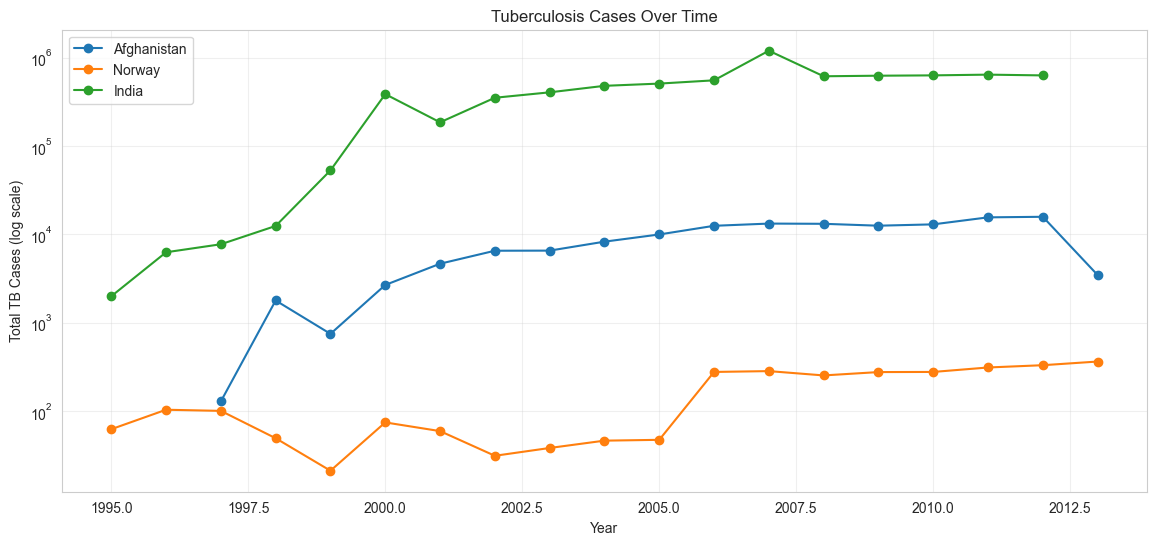

In [36]:
# Aggregate total cases by country and year
df_yearly = df_countries.groupby(['country', 'year'])['cases'].sum().reset_index()

# Plot time series
plt.figure(figsize=(14, 6))
for country in ['Afghanistan', 'Norway', 'India']:
    data = df_yearly[df_yearly['country'] == country]
    plt.plot(data['year'], data['cases'], marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Total TB Cases (log scale)')
# Log scale to see patterns across countries with different magnitudes
plt.yscale('log')
plt.title('Tuberculosis Cases Over Time')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [37]:
print(df_yearly.head())

       country  year  cases
0  Afghanistan  1997    128
1  Afghanistan  1998   1778
2  Afghanistan  1999    745
3  Afghanistan  2000   2666
4  Afghanistan  2001   4639


## 7. Compare by Sex

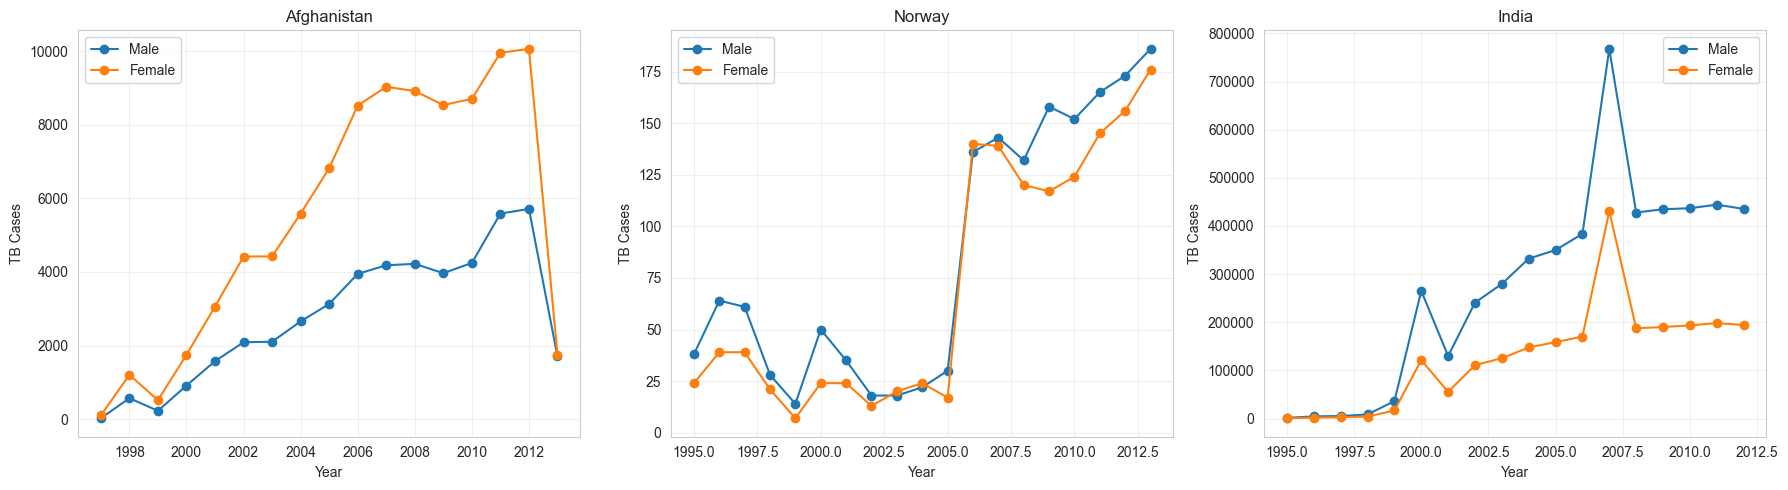

In [ ]:
# Aggregate by country, year, and sex
df_sex = df_countries.groupby(['country', 'year', 'sex'])['cases'].sum().reset_index()

# Plot comparison with explicit colors and markers
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

colors = {'m': 'blue', 'f': 'red'}
markers = {'m': 'o', 'f': 's'}

for idx, country in enumerate(['Afghanistan', 'Norway', 'India']):
    data = df_sex[df_sex['country'] == country]
    for sex in ['m', 'f']:
        sex_data = data[data['sex'] == sex]
        label = 'Male' if sex == 'm' else 'Female'
        axes[idx].plot(sex_data['year'], sex_data['cases'], 
                      marker=markers[sex], color=colors[sex], 
                      label=label, linewidth=2, markersize=6)
    
    axes[idx].set_title(f'{country}', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Year')
    axes[idx].set_ylabel('TB Cases')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary to verify
print("\nSummary by Sex for Afghanistan (first 5 years):")
afg_summary = df_sex[df_sex['country'] == 'Afghanistan'].head(10)
print(afg_summary)

### Verification: Sex Comparison Analysis

**Key Findings:**
- **Afghanistan**: Females consistently show higher TB cases than males
- **India**: Males consistently show higher TB cases than females  
- **Norway**: Very low case counts with mixed patterns

This demonstrates important epidemiological differences between countries.

In [ ]:
# Check Afghanistan sex data specifically
afg_sex = df_sex[df_sex['country'] == 'Afghanistan'].sort_values('year')
print("Afghanistan TB Cases by Sex:")
print(afg_sex)
print("\n" + "="*60)
print("\nVerification: Female vs Male cases for Afghanistan")
afg_pivot = afg_sex.pivot(index='year', columns='sex', values='cases')
afg_pivot['difference (f-m)'] = afg_pivot['f'] - afg_pivot['m']
print(afg_pivot)

## 8. Summary Statistics

In [11]:
# Calculate summary statistics for each country
for country in ['Afghanistan', 'Norway', 'India']:
    country_data = df_countries[df_countries['country'] == country]
    total_cases = country_data['cases'].sum()
    years_reported = country_data['year'].nunique()
    avg_per_year = country_data.groupby('year')['cases'].sum().mean()
    
    print(f"\n{country}:")
    print(f"  Total cases reported: {total_cases:,}")
    print(f"  Years with data: {years_reported}")
    print(f"  Average cases per year: {avg_per_year:,.0f}")


Afghanistan:
  Total cases reported: 140,225
  Years with data: 17
  Average cases per year: 8,249

Norway:
  Total cases reported: 2,992
  Years with data: 19
  Average cases per year: 157

India:
  Total cases reported: 7,291,701
  Years with data: 18
  Average cases per year: 405,094
